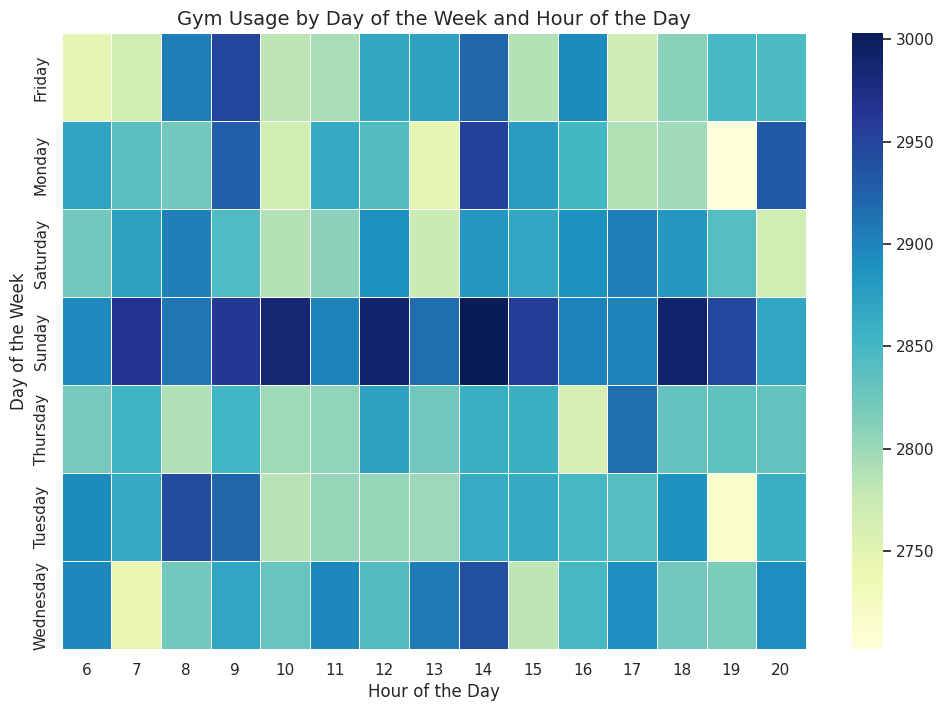

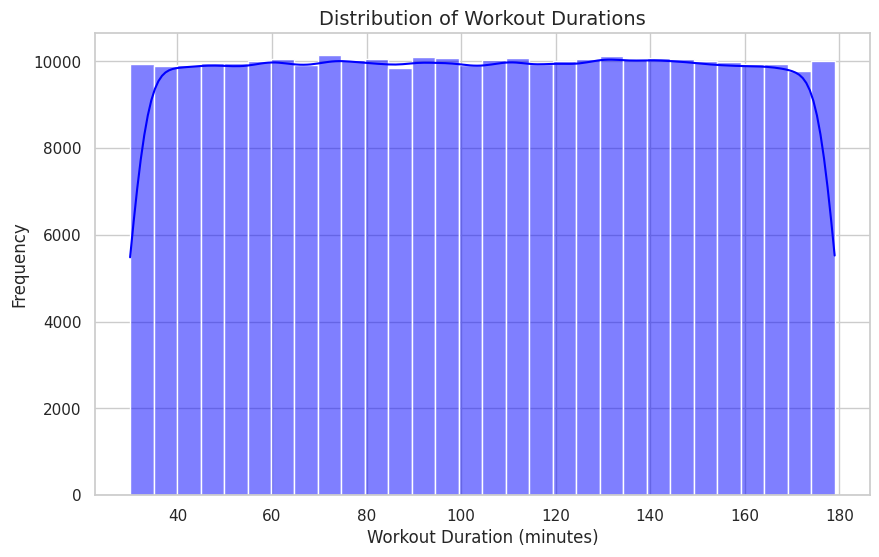

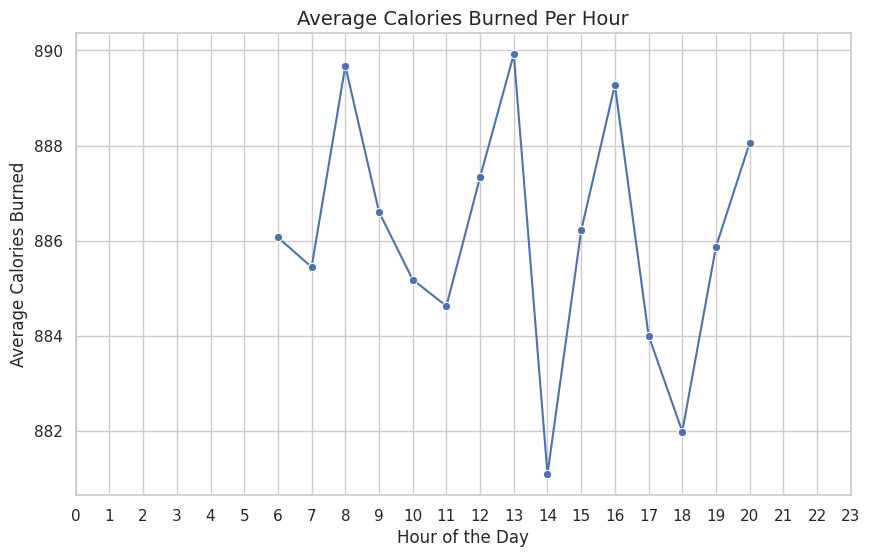

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the style for clearer visualization
sns.set(style="whitegrid")

# Load the dataset
file_path = '/content/checkin_checkout_history_updated.csv'
data = pd.read_csv(file_path)

# Convert checkin_time and checkout_time to datetime for accurate duration calculation
data['checkin_time'] = pd.to_datetime(data['checkin_time'], errors='coerce')
data['checkout_time'] = pd.to_datetime(data['checkout_time'], errors='coerce')

# Calculate the duration of workouts in minutes, ignoring rows with invalid datetime entries
data = data.dropna(subset=['checkin_time', 'checkout_time'])
data['workout_duration'] = (data['checkout_time'] - data['checkin_time']
                            ).dt.total_seconds() / 60  # Convert duration to minutes

# 1. Heatmap: Gym usage by day of the week and hour of the day


def plot_gym_usage_heatmap():
    """
    Plots a heatmap showing the frequency of check-ins by day of the week and hour of the day.
    """
    # Extract day of the week and hour from checkin_time
    data['day_of_week'] = data['checkin_time'].dt.day_name()
    data['hour'] = data['checkin_time'].dt.hour

    # Create a pivot table to count check-ins
    usage_pivot = data.pivot_table(
        index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

    plt.figure(figsize=(12, 8))
    sns.heatmap(usage_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='white')
    plt.title('Gym Usage by Day of the Week and Hour of the Day', fontsize=14)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Day of the Week', fontsize=12)
    plt.show()

# Histogram: Distribution of Workout Durations


def plot_workout_duration_histogram():
    """
    Plots a histogram showing the distribution of workout durations.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data['workout_duration'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Workout Durations', fontsize=14)
    plt.xlabel('Workout Duration (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()


# 3. Line Plot: Average calories burned per hour
def plot_avg_calories_per_hour():
    """
    Plots a line chart showing the average calories burned at each hour of the day.
    """
    data['hour'] = data['checkin_time'].dt.hour  # Extract the hour of the check-in time
    hourly_avg_calories = data.groupby(
        'hour')['calories_burned'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='hour', y='calories_burned',
                 data=hourly_avg_calories, marker='o')
    plt.title('Average Calories Burned Per Hour', fontsize=14)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Average Calories Burned', fontsize=12)
    plt.xticks(np.arange(0, 24, 1))  # Display all 24 hours on the x-axis
    plt.show()


# Plot the graphs
plot_gym_usage_heatmap()
plot_workout_duration_histogram()
plot_avg_calories_per_hour()
